<a href="https://colab.research.google.com/github/dacenish/Deep-Learning/blob/main/Customer_Churn_Prediction_using_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
from google.colab import drive

In [69]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
df = pd.read_csv('/content/drive/MyDrive/Deep Learning/Datasets/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [72]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [73]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [74]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [75]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [76]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace= True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [78]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [79]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Exited'])
y = df['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test )

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [93]:
model = Sequential()

model.add(Dense(11,activation='sigmoid', input_dim=11)) # input_dim = 11 column and 3 node in layer 0
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid',))

In [94]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 11)                132       
                                                                 
 dense_15 (Dense)            (None, 11)                132       
                                                                 
 dense_16 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [97]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)


Epoch 1/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5574 - accuracy: 0.7912 - val_loss: 0.4162 - val_accuracy: 0.8219
Epoch 2/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5168 - accuracy: 0.7958 - val_loss: 0.4215 - val_accuracy: 0.8194
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.7958 - val_loss: 0.4234 - val_accuracy: 0.8200
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5081 - accuracy: 0.7958 - val_loss: 0.4268 - val_accuracy: 0.8156
Epoch 5/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5058 - accuracy: 0.7958 - val_loss: 0.4290 - val_accuracy: 0.8138
Epoch 6/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5044 - accuracy: 0.7958 - val_loss: 0.4314 - val_accuracy: 0.8119
Epoch 7/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5037 - accuracy: 0.7958 - val_loss: 0.4351 - val_accuracy: 0.8075

In [ ]:
model.layers[0].get_weights()

In [ ]:
model.layers[1].get_weights()

In [98]:
y_pred = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [99]:
y_pred

array([[0.08626436],
       [0.16515245],
       [0.05593418],
       ...,
       [0.14604867],
       [0.05459779],
       [0.16366643]], dtype=float32)

In [100]:
y_pred = y_pred.argmax(axis=-1)

In [101]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.7975

In [102]:
history.history

{'loss': [0.5573920607566833,
  0.5167848467826843,
  0.511241614818573,
  0.5081350803375244,
  0.5058413147926331,
  0.5044465065002441,
  0.5036688446998596,
  0.5028910636901855,
  0.5023577809333801,
  0.5019108057022095,
  0.5016620755195618,
  0.5012007355690002,
  0.5014426708221436,
  0.5009626150131226,
  0.5007967948913574,
  0.5005886554718018,
  0.5003547072410583,
  0.5004878044128418,
  0.5004294514656067,
  0.5000684857368469,
  0.5000438690185547,
  0.500036895275116,
  0.5000702142715454,
  0.49988383054733276,
  0.49988335371017456,
  0.49986788630485535,
  0.4997894763946533,
  0.49977612495422363,
  0.49975690245628357,
  0.4998859763145447,
  0.4996989071369171,
  0.4998142123222351,
  0.499711811542511,
  0.4997011125087738,
  0.49958229064941406,
  0.5001679062843323,
  0.5002854466438293,
  0.49986743927001953,
  0.5002208352088928,
  0.49973729252815247,
  0.49971556663513184,
  0.49957576394081116,
  0.4996468722820282,
  0.49939361214637756,
  0.499645918607

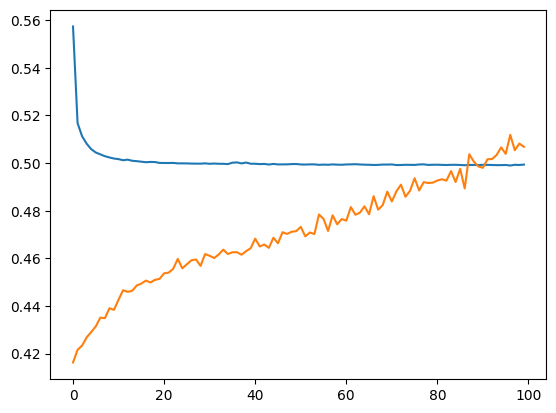

In [103]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

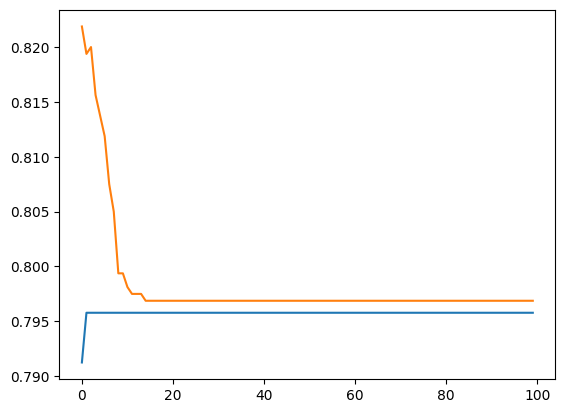

In [104]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])